<a href="https://colab.research.google.com/github/Thatphol/EDA-Using-Python/blob/main/Online_Shop_Customer_Sales_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Explaint a columne

Customer_id = unique customer id

Age = customer's age

Gender = 0: Male, 1: Female

Revenue_Total = total sales by customer

N_Purchases = number of purchases to date

Purchase_DATE = date latest purchase, dd.mm.yy

Purchase_VALUE = latest purchase in €

Pay_Method = 0: Digital Wallets, 1: Card, 2: PayPal, 3: Other

Time_Spent = time spent (in sec) on website

Browser = 0: Chrome, 1: Safari, 2: Edge, 3: Other

Newsletter = 0: not subscribed, 1: subscribed

Voucher = 0: not used, 1: used

Refferance data : https://www.kaggle.com/datasets/onlineretailshop/online-shop-customer-sales-data


**Data processing :**
1. Desriptive statistic

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from datetime import date
import warnings
warnings.filterwarnings("ignore")

colors_t = ['#001219', '#005f73', '#0a9396', '#94d2bd', '#e9d8a6']

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/Online Shop Customer Sales Data.csv')
df.head(5)

,Customer_id,Age,Gender,Revenue_Total,N_Purchases,Purchase_DATE,Purchase_VALUE,Pay_Method,Time_Spent,Browser,Newsletter,Voucher
0,504308,53,0,45.3,2,22.06.21,24.915,1,885,0,0,0
1,504309,18,1,36.2,3,10.12.21,2.896,2,656,0,0,1
2,504310,52,1,10.6,1,14.03.21,10.600,0,761,0,1,0
3,504311,29,0,54.1,5,25.10.21,43.280,1,906,0,1,0
4,504312,21,1,56.9,1,14.09.21,56.900,1,605,0,1,0


**Desriptive statistic**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65796 entries, 0 to 65795
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Customer_id     65796 non-null  int64  
 1   Age             65796 non-null  int64  
 2   Gender          65796 non-null  int64  
 3   Revenue_Total   65796 non-null  float64
 4   N_Purchases     65796 non-null  int64  
 5   Purchase_DATE   65796 non-null  object 
 6   Purchase_VALUE  65796 non-null  float64
 7   Pay_Method      65796 non-null  int64  
 8   Time_Spent      65796 non-null  int64  
 9   Browser         65796 non-null  int64  
 10  Newsletter      65796 non-null  int64  
 11  Voucher         65796 non-null  int64  
dtypes: float64(2), int64(9), object(1)
memory usage: 6.0+ MB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer_id,65796.0,537205.500000,18993.813493,504308.000,520756.75000,537205.50,553654.250,570103.0
Age,65796.0,39.592696,13.825466,16.000,28.00000,40.00,51.000,63.0
Gender,65796.0,0.671348,0.469727,0.000,0.00000,1.00,1.000,1.0
Revenue_Total,65796.0,27.732935,14.941878,0.500,15.30000,30.10,37.600,59.9
N_Purchases,65796.0,3.992477,2.004370,1.000,2.00000,4.00,6.000,7.0
Purchase_VALUE,65796.0,15.968699,13.229295,0.005,4.81975,12.64,24.752,59.9
Pay_Method,65796.0,1.308651,1.081959,0.000,0.00000,1.00,2.000,3.0
Time_Spent,65796.0,598.925603,277.833635,120.000,358.00000,598.00,840.000,1080.0
Browser,65796.0,0.630935,0.996407,0.000,0.00000,0.00,1.000,3.0
Newsletter,65796.0,0.151027,0.358078,0.000,0.00000,0.00,0.000,1.0


In [ ]:
df.head()

,Customer_id,Age,Gender,Revenue_Total,N_Purchases,Purchase_DATE,Purchase_VALUE,Pay_Method,Time_Spent,Browser,Newsletter,Voucher
0,504308,53,0,45.3,2,22.06.21,24.915,1,885,0,0,0
1,504309,18,1,36.2,3,10.12.21,2.896,2,656,0,0,1
2,504310,52,1,10.6,1,14.03.21,10.600,0,761,0,1,0
3,504311,29,0,54.1,5,25.10.21,43.280,1,906,0,1,0
4,504312,21,1,56.9,1,14.09.21,56.900,1,605,0,1,0


In [ ]:
df['day'] = df['Purchase_DATE'].str.split('.').str[0]
df['month'] = df['Purchase_DATE'].str.split('.').str[1]
df['year'] = df['Purchase_DATE'].str.split('.').str[2]

df['day'] = df['day'].astype(int)
df['month'] = df['month'].astype(int)
df['year'] = df['year'].astype(int)

df['date'] = pd.to_datetime(df['day'].astype(str) + '/' + df['month'].astype(str) + '/' + df['year'].astype(str), format='%d/%m/%y')

df.drop(['Purchase_DATE'], axis=1, inplace=True)

df['Q'] = pd.DatetimeIndex(df['date']).quarter

In [ ]:
df['Pay_Method'].replace({0:'Digital Wallets',
                          1:'Card',
                          2:'Paypal',
                          3:'Other'}, inplace=True)

df['Browser'].replace({0: 'Chrome',
                       1: 'Safari',
                       2: 'Edge',
                       3: 'Other'}, inplace=True)

# df['Gender'].replace({0: 'Female',
#                       1: 'Male'}, inplace=True)

df['Newsletter'].replace({0: 'not subscribed',
                          1: 'subscribed'}, inplace=True)

df['Voucher'].replace({0: 'not used',
                       1: 'used'}, inplace=True)

In [ ]:
# Crate group of age
age_bin = [15, 25, 35, 45, 65]
age_lable = ['16-25', '26-35', '36-45', '46-63']
df['Age_range'] = pd.cut(df['Age'], bins=age_bin, labels=age_lable)

In [ ]:
df.groupby('month')['Revenue_Total'].agg('mean').mean().round(2)

27.73

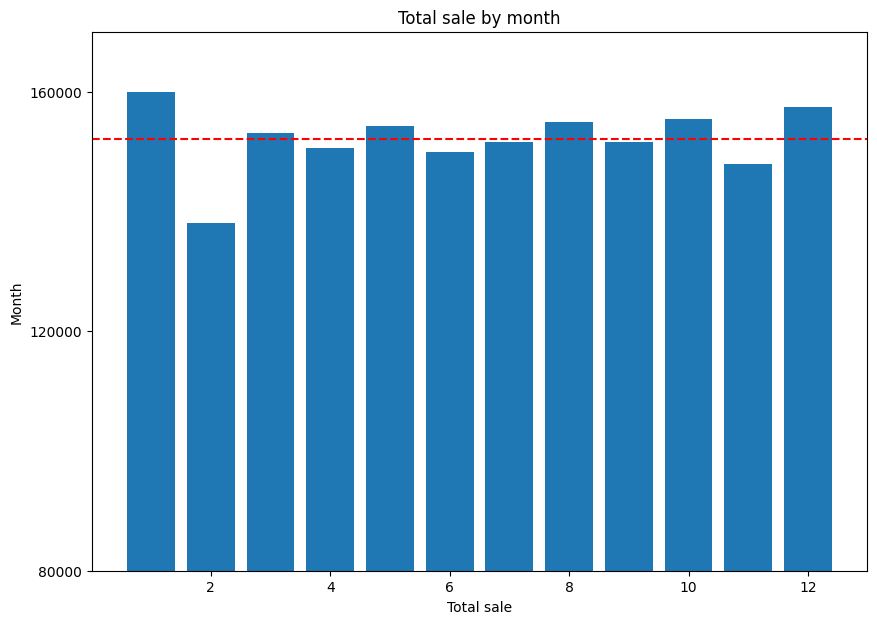

In [ ]:
group_m_sale = df.groupby('month')['Revenue_Total'].agg('sum')

# Additional average line
avg_line = group_m_sale.mean()
fig, ax = plt.subplots(figsize=(10, 7))
plot1 = ax.bar(group_m_sale.index, group_m_sale.values)
ax.axhline(y=avg_line, color='red', linestyle='--')

plt.ylabel('Month')
plt.xlabel('Total sale')
plt.title('Total sale by month')
plt.yticks(np.arange(80000, 170001, 40000),
           np.arange(80000, 170001, 40000))

plt.ylim([80000, 170000])

plt.show()

# จากข้อมูลจะพบว่า
ยอดขายในเดือนที่ 2 นั้นต่ำที่สุด

<Axes: title={'center': 'Total sale per day'}, xlabel='day'>

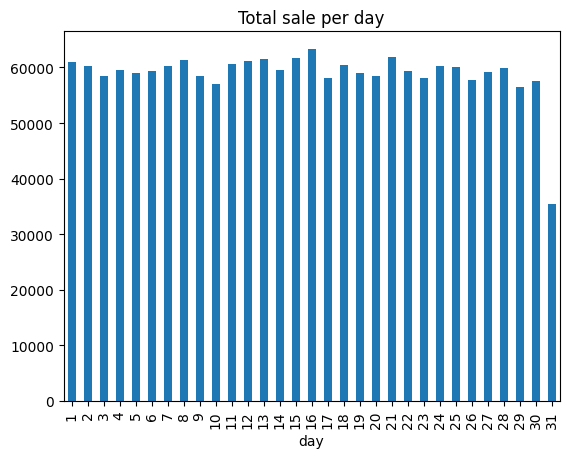

In [ ]:
df.groupby('day')['Revenue_Total'].agg('sum').plot(kind='bar', title='Total sale per day')

# จากข้อมูลจะพบว่า
ยอดขายในที่ 31 นั้นต่ำ แต่อาจจะเป็นเพราะว่า แต่ละเดือนมีจำนวนวันที่ไม่เท่ากัน

<Figure size 1000x600 with 0 Axes>

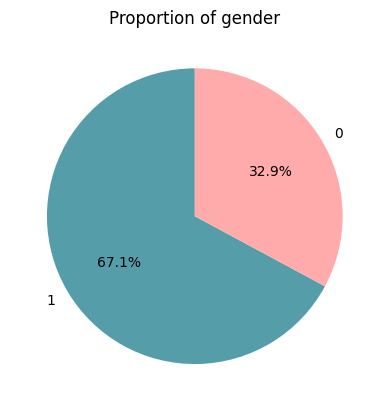

In [ ]:
plt.figure(figsize=(10,6))
gen = df['Gender'].value_counts()

fig, ax = plt.subplots()
ax.pie(gen, labels=gen.index, autopct='%1.1f%%', startangle=90, colors=['#569DAA', '#FFABAB'])

plt.title('Proportion of gender')
plt.show()

<Axes: xlabel='Gender', ylabel='count'>

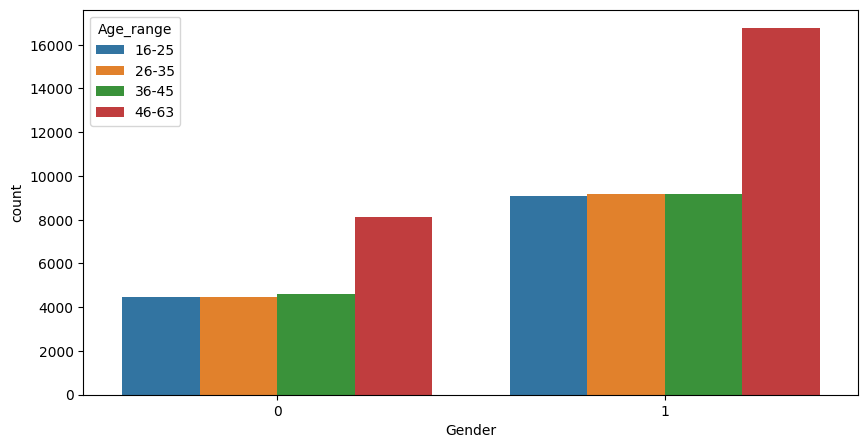

In [ ]:
plt.figure(figsize=(10,5))

sns.countplot(data=df, x='Gender', hue='Age_range')

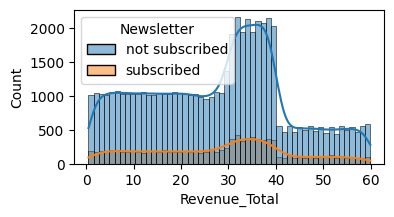

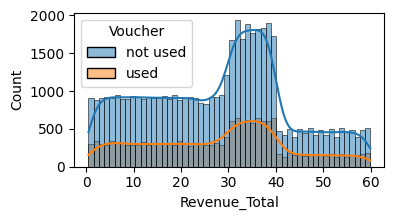

In [ ]:
col = ['Newsletter', 'Voucher']

for i in col:
  plt.figure(figsize=(4,2))
  sns.histplot(data=df, x=df['Revenue_Total'], hue=df[i], kde=True)

In [ ]:
vouch_counts = df['Voucher'].value_counts()

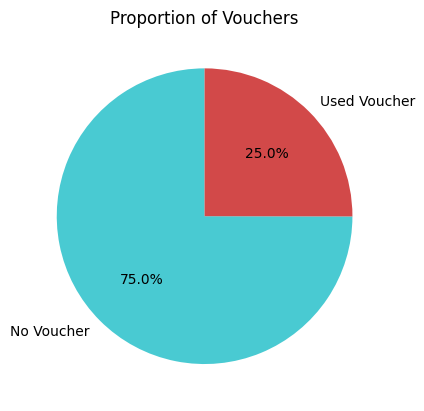

In [ ]:
voucher_percents = vouch_counts / vouch_counts.sum() * 100
labels = ['No Voucher', 'Used Voucher']
colors = ['#49CAD2','#D24949']

plt.pie(voucher_percents, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Vouchers')
plt.show()

In [ ]:
df.columns

Index(['Customer_id', 'Age', 'Gender', 'Revenue_Total', 'N_Purchases',
       'Purchase_VALUE', 'Pay_Method', 'Time_Spent', 'Browser', 'Newsletter',
       'Voucher', 'day', 'month', 'year', 'date', 'Q', 'Age_range'],
      dtype='object')

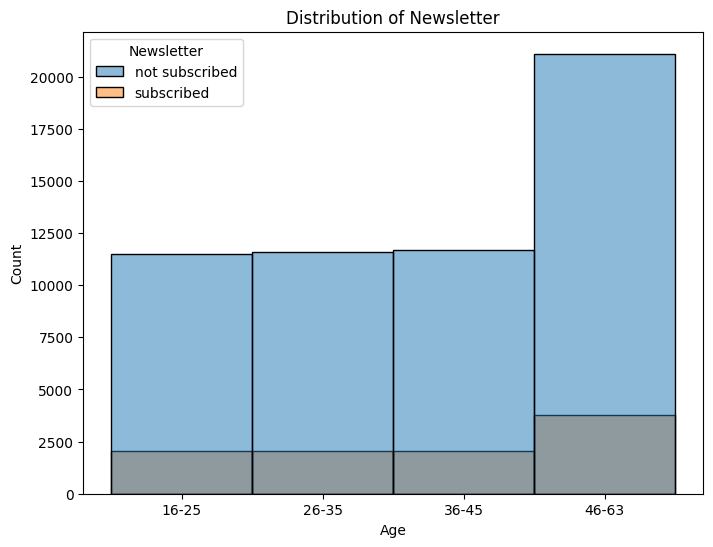

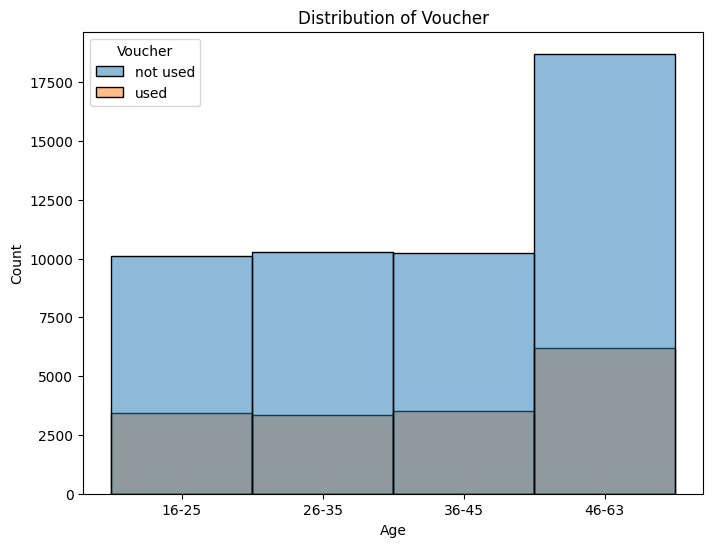

In [ ]:
col = ['Newsletter', 'Voucher']

for i in col:
  plt.figure(figsize=(8, 6))
  sns.histplot(data=df, x=df['Age_range'], hue=df[i])
  plt.title(f'Distribution of {i}')
  plt.xlabel('Age')
  plt.ylabel('Count')
  plt.show()

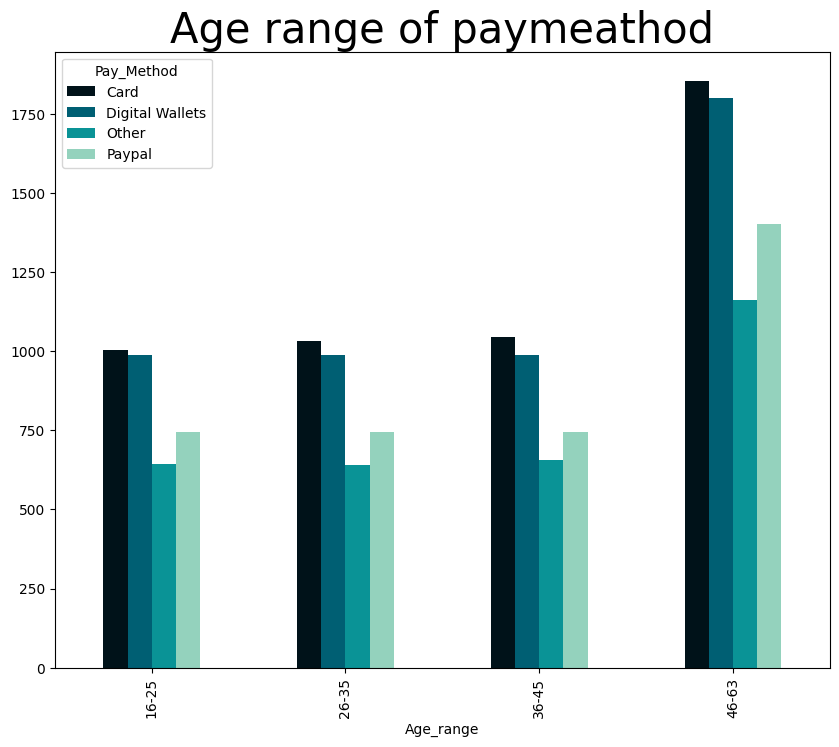

In [ ]:
arp = pd.crosstab(df['Age_range'], df['Pay_Method'], values=df['Pay_Method'], aggfunc='count')
arp.div(arp.count(1).astype(float), axis = 0).plot(kind = 'bar',  figsize = (10, 8), color = colors_t)

plt.title('Age range of paymeathod', fontsize = 30)
plt.show()

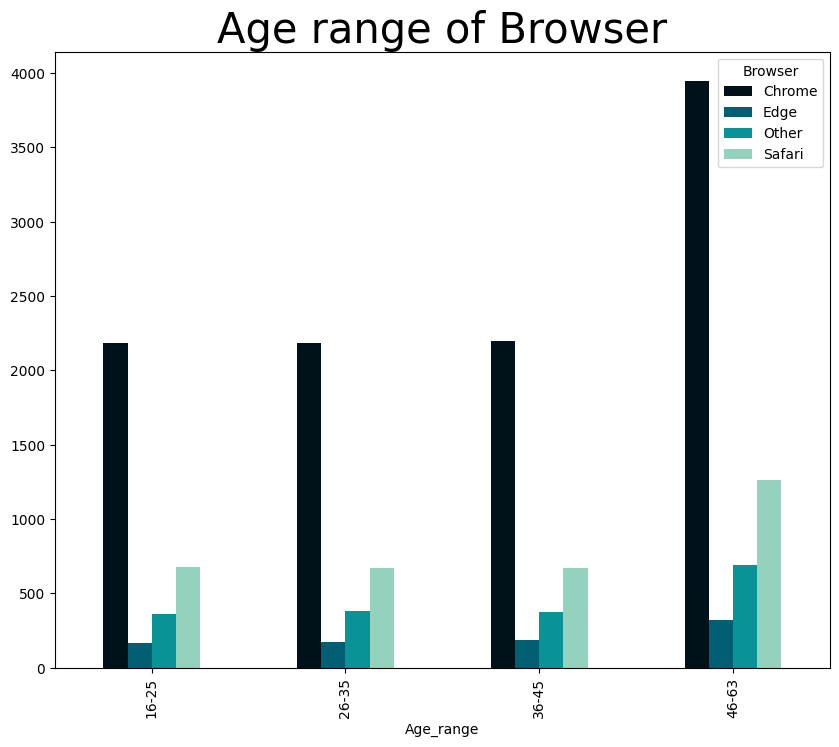

In [ ]:
arp = pd.crosstab(df['Age_range'], df['Browser'])
arp.div(arp.count(1).astype(float), axis = 0).plot(kind = 'bar',  figsize = (10, 8), color = colors_t)

plt.title('Age range of Browser', fontsize = 30)
plt.show()

In [ ]:
# sns.pairplot(data=test)

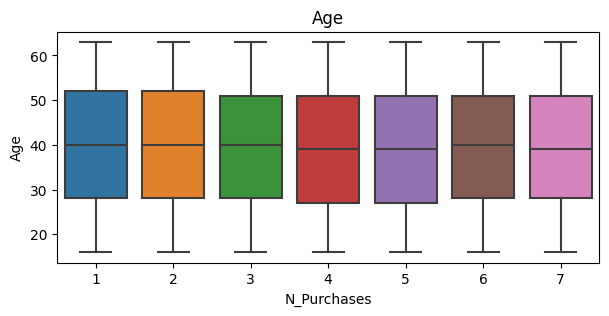

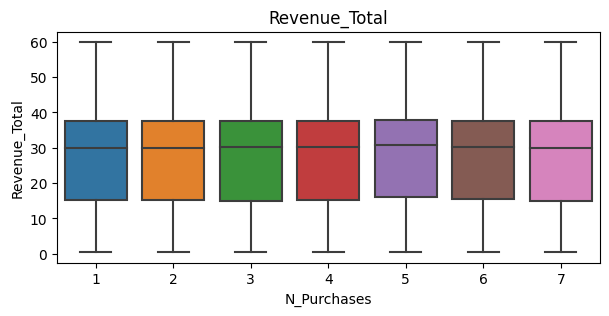

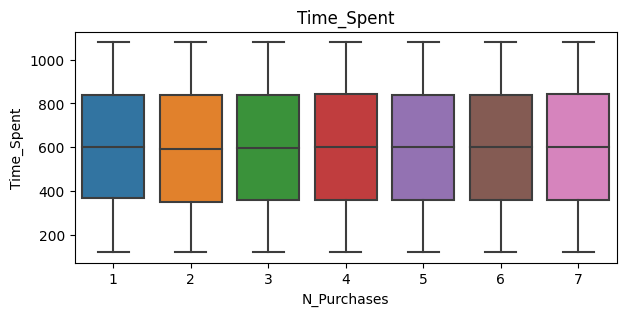

In [ ]:
test = df[['Age', 'Revenue_Total', 'Time_Spent']]

for i in test:
  plt.figure(figsize=(7, 3))
  sns.boxplot(data=df, x=df['N_Purchases'], y=df[i])
  plt.title(i)

In [ ]:
df.head()

,Customer_id,Age,Gender,Revenue_Total,N_Purchases,Purchase_VALUE,Pay_Method,Time_Spent,Browser,Newsletter,Voucher,day,month,year,date,Q,Age_range
0,504308,53,0,45.3,2,24.915,Card,885,Chrome,not subscribed,not used,22,6,21,2021-06-22,2,46-63
1,504309,18,1,36.2,3,2.896,Paypal,656,Chrome,not subscribed,used,10,12,21,2021-12-10,4,16-25
2,504310,52,1,10.6,1,10.600,Digital Wallets,761,Chrome,subscribed,not used,14,3,21,2021-03-14,1,46-63
3,504311,29,0,54.1,5,43.280,Card,906,Chrome,subscribed,not used,25,10,21,2021-10-25,4,26-35
4,504312,21,1,56.9,1,56.900,Card,605,Chrome,subscribed,not used,14,9,21,2021-09-14,3,16-25


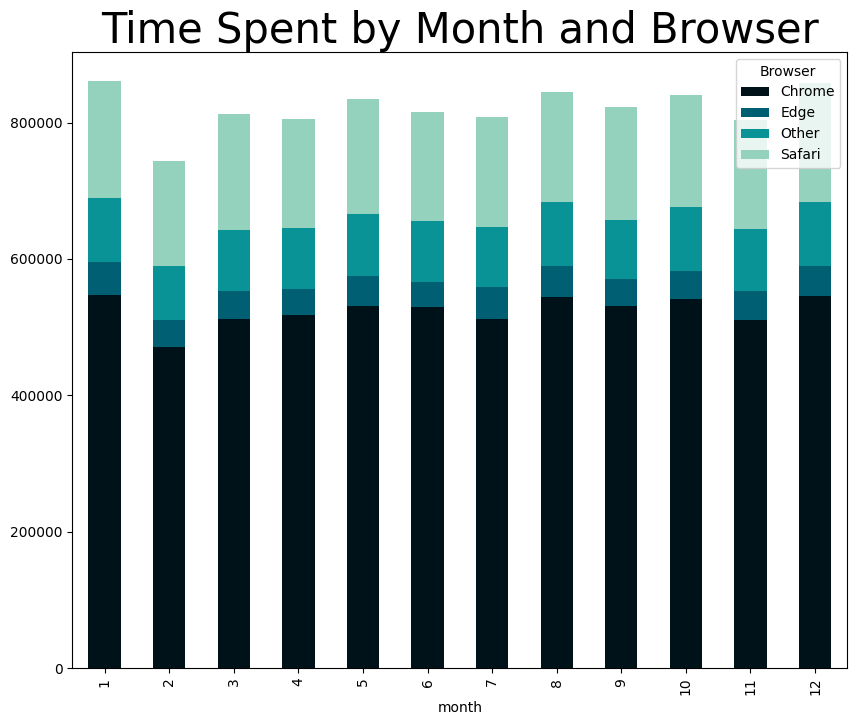

In [ ]:
arp = pd.crosstab(df['month'], df['Browser'], values=df['Time_Spent'], aggfunc='sum')
arp.div(arp.count(1).astype(float), axis = 0).plot(kind = 'bar',stacked=True, figsize = (10, 8), color = colors_t)

plt.title('Time Spent by Month and Browser', fontsize = 30)
plt.show()

**Conclusion** :
